In [1]:
# My neural net model
from neural_net import neural_net
from vis_utils import plotStats, plotData
from gradient_utils import gradient_difference
from tuning_utils import tuning_hyper_parameter

# Linear algebra library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# BACKPROPAGATE NETWORK

In [220]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,1])

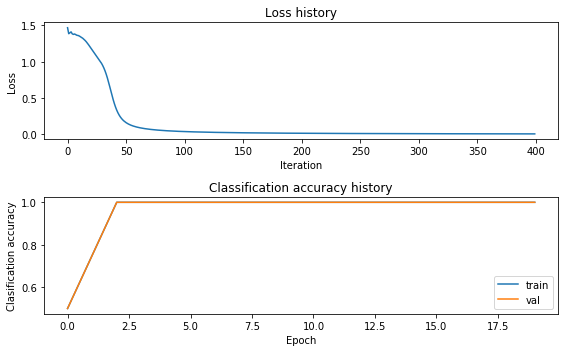

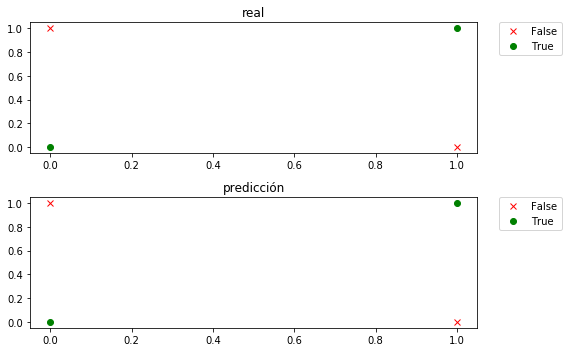

In [221]:
net_params = {'il':2,'hl1':2,'ol':2}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
net = neural_net(net_params, activation_function= activ_function,
                 cost_function= cost_function, std= 1)
results = net.train_sgd_momentum(X, y, X, y, learning_rate=2.1, 
                                 learning_rate_decay=1, reg = 0.0,
                                 max_iter = 400, batch_size = 2, verbose =  True, rho=0.7, stochastic = False, epoch = 20)
plotStats(results)

y_pred = net.predict(X)
plotData(X, y, y_pred)

In [227]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,0])

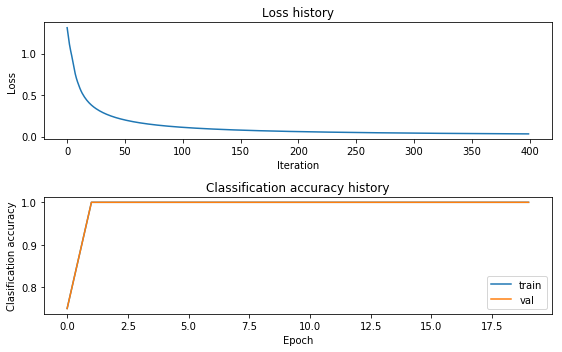

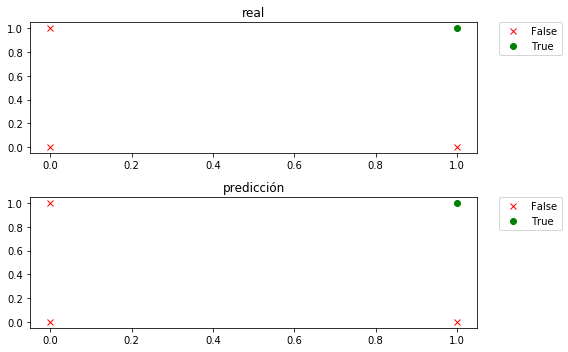

In [229]:
net_params = {'il':2,'ol':2}
activ_function = 'Sigmoid'
cost_function = 'Entropy_Loss'
net = neural_net(net_params, activation_function= activ_function,
                 cost_function= cost_function, std= 0.5)

results = net.train_sgd_momentum(X, y, X, y, learning_rate=0.9, 
                                 learning_rate_decay=0.99, reg = 0.0,
                                 max_iter = 400, batch_size = 1, verbose =  True, rho = 0.70, stochastic = False)

plotStats(results)
y_pred = net.predict(X)
plotData(X, y, y_pred)

# PERCEPTRON

## Linealmente separable

In [200]:
X = np.array([[1,1,1],
              [1,0,1],
              [1,1,0],
              [1,0,0]])

y = np.array([1,0,0,0])

w = np.random.rand(3)


In [201]:
P = []
N = []
for i in range(len(y)):
    if y[i] == 1:
        P.append(i)
    else:
        N.append(i)

In [202]:
def checkConvergence(X, w, y):
    score = X @ w
    d = ((score) > 0).astype(int)
    if np.linalg.norm(d-y) <= 0.1:
        return True, 0
    else:
        return False, np.linalg.norm(d-y)
    
def predict(X, w):
    score = X @ w
    d = ((score) > 0).astype(int)
    return d

In [203]:
from tqdm.autonotebook import tqdm

convergence = False
cont = 0
with tqdm() as pbar:
    while convergence != True:
        indx = np.random.choice(4)
        x = X[indx]
        if indx in P and int(x.dot(w))<=0:
            w = w + x
        if indx in N and int(x.dot(w))>=0:
            w = w - x
        convergence, dif = checkConvergence(X, w, y)
        pbar.set_description(f'dif {dif}')
        cont += 1
        if cont > 500:
            print('Stuck Method')
            break
        pbar.update(1)

In [204]:
predict(X,w)

array([1, 0, 0, 0])

In [287]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([1,0,0,0])

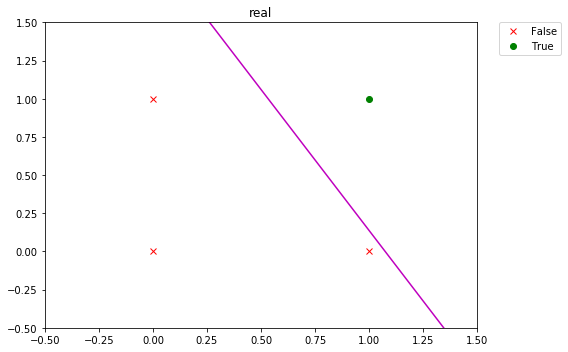

In [206]:
plt.title('real')
cross, = plt.plot([],[],'rx')
good, = plt.plot([],[],'go')
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X[i,0], X[i,1], 'rx')
    else:
        plt.plot(X[i,0],X[i,1], 'go')
plt.legend(handles = [cross, good], labels = ['False', 'True'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
x_var = np.linspace(-0.5,1.5,10)
y_var = -x_var * (w[1]/w[2]) - w[0]/w[2]
plt.ylim(-0.5,1.5)
plt.xlim(-0.5,1.5)
plt.plot(x_var, y_var, 'm-')
plt.tight_layout()

## linealmente no separable

In [346]:
X = np.array([[1,1,1],
              [1,0,1],
              [1,1,0],
              [1,0,0]])

y = np.array([0,1,1,0])

w1 = np.random.rand(3,2)
w2 = np.random.rand(3)

In [347]:
w1 = np.array([[-0.5, 1.5],
               [1, -1],
               [1, -1]])

w2 = np.array([-1.5, 1, 1])

In [348]:
P = []
N = []
for i in range(len(y)):
    if y[i] == 1:
        P.append(i)
    else:
        N.append(i)

In [349]:
def checkConvergence(X, w1, w2, y):
    fcl1 = np.hstack((np.ones((4,1)),X.dot(w1)))
    fcl2 = fcl1.dot(w2)
    d = ((fcl2) > 0).astype(int)
    if np.linalg.norm(d-y) <= 0.1:
        return True, 0
    else:
        return False, np.linalg.norm(d-y)
    
def predict(X,w1, w2):
    fcl1 = np.hstack((np.ones((4,1)),X.dot(w1)))
#     print(fcl1)
    fcl1 = step(fcl1)
#     print(fcl1)
    fcl2 = fcl1.dot(w2)
#     print(fcl2)
    d = ((fcl2) > 0).astype(int)
    return d

def step(z):
    h = (z > 0).astype(int) - (z <= 0).astype(int)
    return h

In [350]:
y_pred = predict(X, w1, w2)
y_pred

array([0, 1, 1, 0])

In [351]:
X = np.array([[1,1],
              [0,1],
              [1,0],
              [0,0]])

y = np.array([0,1,1,0])

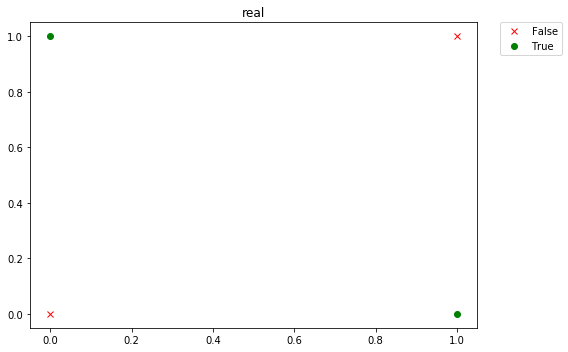

In [353]:
plt.title('real')
cross, = plt.plot([],[],'rx')
good, = plt.plot([],[],'go')
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X[i,0], X[i,1], 'rx')
    else:
        plt.plot(X[i,0],X[i,1], 'go')
plt.legend(handles = [cross, good], labels = ['False', 'True'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()

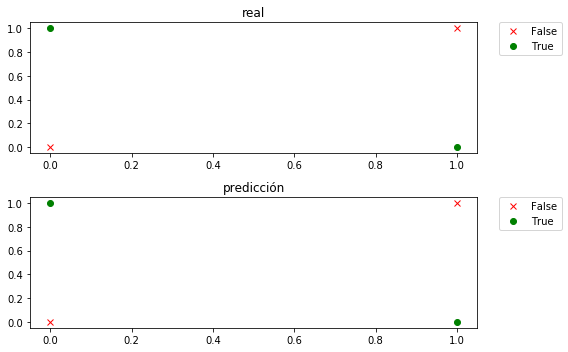

In [352]:
plotData(X, y, y_pred)